In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [81]:

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [82]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Preprocessing

In [84]:
# Convert Gender column to numerical values (Male=0, Female=1)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

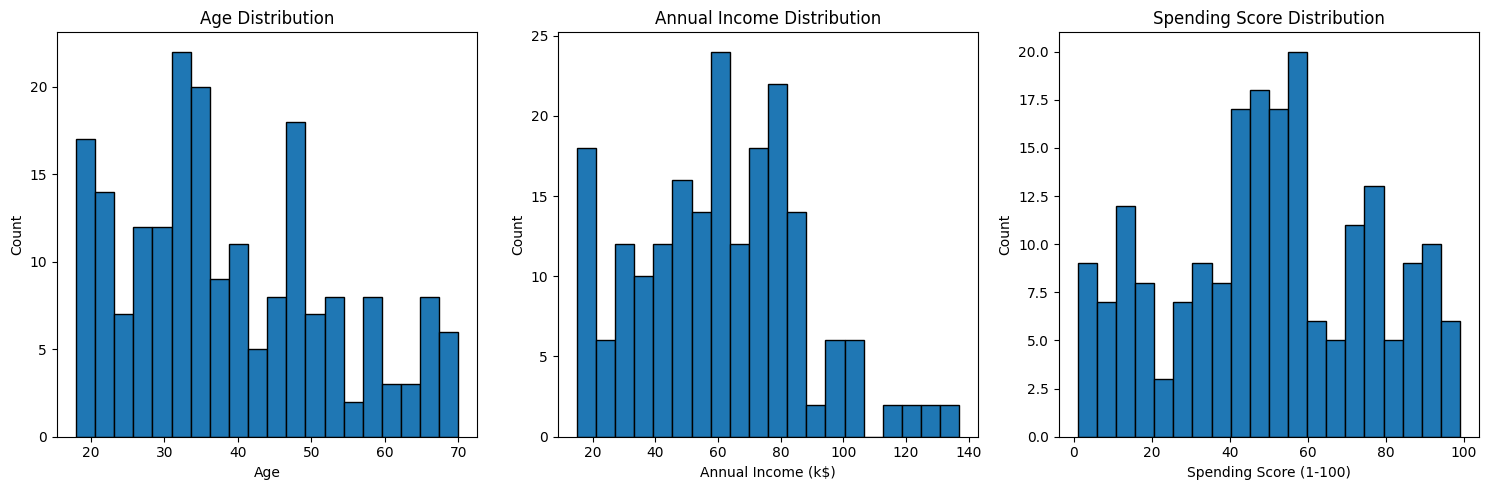

In [85]:
# Histograms for Numerical Features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(data['Annual Income (k$)'], bins=20, edgecolor='k')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(data['Spending Score (1-100)'], bins=20, edgecolor='k')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


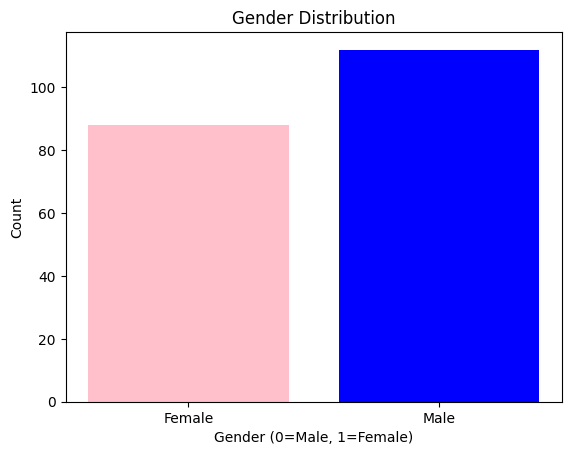

In [86]:
# Gender Distribution Bar Plot
gender_counts = data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.xticks(gender_counts.index, labels=['Male', 'Female'])
plt.show()


In [87]:
# Select features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [88]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Determine the number of clusters (K) using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

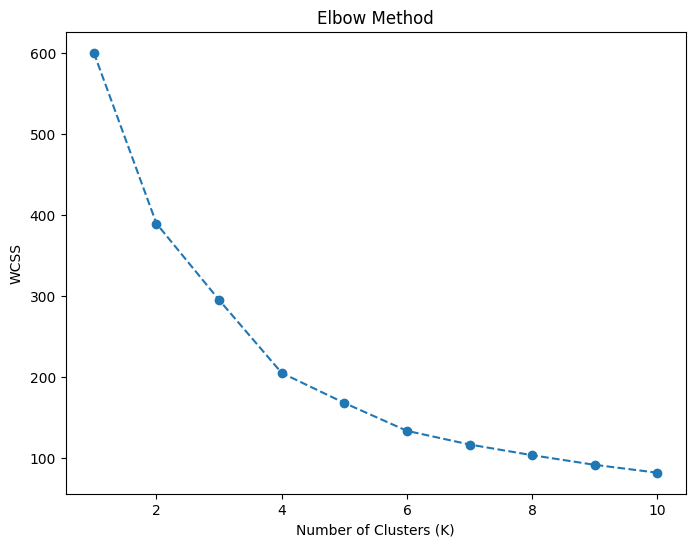

In [90]:

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [91]:
# Based on the Elbow Method, let's choose K=5
k = 5

# Machine Learning approach with clustering algorith

In [92]:

# Apply K-Means clustering with K=5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)
print(kmeans)


KMeans(n_clusters=5, n_init=10, random_state=0)


In [93]:
# Cluster Analysis
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[ 1.20484056 -0.23577338 -0.05236781]
 [ 0.07333084  0.97494509 -1.19729675]
 [-0.42880597  0.97484722  1.21608539]
 [ 0.5310735  -1.2905084  -1.23646671]
 [-0.98067852 -0.74305983  0.46744035]]


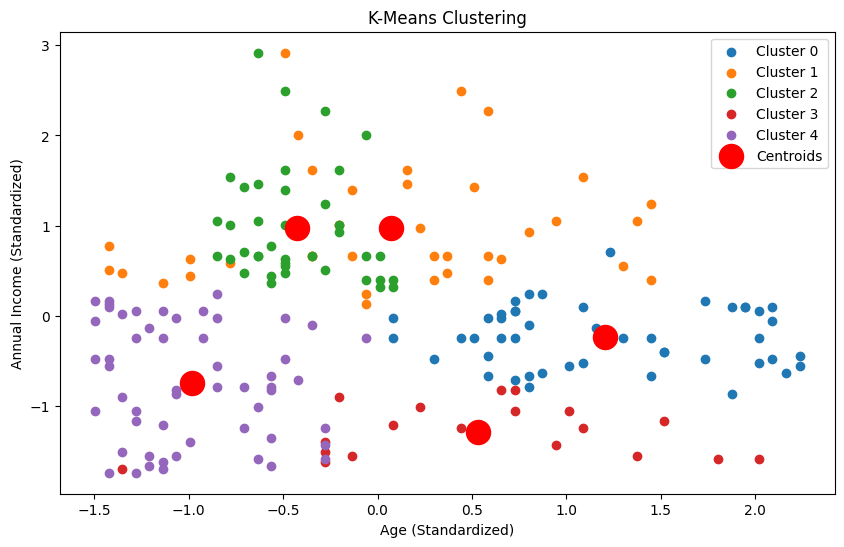

In [94]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X_scaled[data['Cluster'] == i][:, 0], X_scaled[data['Cluster'] == i][:, 1], label=f'Cluster {i}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age (Standardized)')
plt.ylabel('Annual Income (Standardized)')
plt.legend()
plt.show()


In [95]:
# Interpretation of clusters
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    print(f'Cluster {i} (Size: {len(cluster_data)})')
    print(cluster_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

Cluster 0 (Size: 47)
Age                       55.638298
Annual Income (k$)        54.382979
Spending Score (1-100)    48.851064
dtype: float64
Cluster 1 (Size: 39)
Age                       39.871795
Annual Income (k$)        86.102564
Spending Score (1-100)    19.358974
dtype: float64
Cluster 2 (Size: 40)
Age                       32.875
Annual Income (k$)        86.100
Spending Score (1-100)    81.525
dtype: float64
Cluster 3 (Size: 20)
Age                       46.25
Annual Income (k$)        26.75
Spending Score (1-100)    18.35
dtype: float64
Cluster 4 (Size: 54)
Age                       25.185185
Annual Income (k$)        41.092593
Spending Score (1-100)    62.240741
dtype: float64


In [96]:
# Utilize segmentation for marketing or store optimization strategies
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    
    # Marketing Strategy
    if cluster_data['Gender'].mean() >= 0.5:
        gender_preference = 'Female'
    else:
        gender_preference = 'Male'
    
    age_range = f"{int(cluster_data['Age'].min())}-{int(cluster_data['Age'].max())} years"
    income_range = f"${int(cluster_data['Annual Income (k$)'].min())}-" \
                   f"${int(cluster_data['Annual Income (k$)'].max())}"
    spending_score_range = f"{int(cluster_data['Spending Score (1-100)'].min())}-" \
                           f"{int(cluster_data['Spending Score (1-100)'].max())}"
    
    print(f'\nCluster {i} (Size: {len(cluster_data)})')
    print(f'Preferred Gender: {gender_preference}')
    print(f'Age Range: {age_range}')
    print(f'Income Range: {income_range}')
    print(f'Spending Score Range: {spending_score_range}')
    
    # Store Layout Optimization
    if cluster_data['Age'].mean() <= 30:
        print(f'Store Layout Recommendation: Design the store layout to attract younger customers.')
    else:
        print(f'Store Layout Recommendation: Focus on creating a comfortable shopping environment for older customers.')
    
    # Marketing Campaigns
    if cluster_data['Spending Score (1-100)'].mean() >= 70:
        print(f'Marketing Campaign Recommendation: Launch targeted promotions for high-spending customers.')
    elif cluster_data['Spending Score (1-100)'].mean() <= 30:
        print(f'Marketing Campaign Recommendation: Attract low-spending customers with special offers.')
    else:
        print(f'Marketing Campaign Recommendation: Implement a balanced marketing strategy.')



Cluster 0 (Size: 47)
Preferred Gender: Female
Age Range: 40-70 years
Income Range: $38-$79
Spending Score Range: 35-60
Store Layout Recommendation: Focus on creating a comfortable shopping environment for older customers.
Marketing Campaign Recommendation: Implement a balanced marketing strategy.

Cluster 1 (Size: 39)
Preferred Gender: Male
Age Range: 19-59 years
Income Range: $64-$137
Spending Score Range: 1-42
Store Layout Recommendation: Focus on creating a comfortable shopping environment for older customers.
Marketing Campaign Recommendation: Attract low-spending customers with special offers.

Cluster 2 (Size: 40)
Preferred Gender: Female
Age Range: 27-40 years
Income Range: $69-$137
Spending Score Range: 58-97
Store Layout Recommendation: Focus on creating a comfortable shopping environment for older customers.
Marketing Campaign Recommendation: Launch targeted promotions for high-spending customers.

Cluster 3 (Size: 20)
Preferred Gender: Female
Age Range: 20-67 years
Income R